## Assignment 4 - Deadline: Oct 28, 2024, Mon 11pm

#### DSAI 510 Fall 2024

Complete the assignment below and upload <span style="color:red">both the .ipynb file and its pdf</span> to https://moodle.boun.edu.tr by the deadline given above. The submission page on Moodle will close automatically after this date and time.


To make a pdf, this may work: Hit CMD+P or CTRL+P, and save it as PDF. You may also use other options from the File menu.

In [44]:
# Run this cell first

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the display option to show all rows scrolling with a slider
pd.set_option('display.max_rows', None)
# To disable this, run the line below:
# pd.reset_option('display.max_rows')

## Note: 
In the problems below, if it asks, "show the number of records that are nonzero", 
the answer is a number; so you don't need to show the records themselves.
But if it asks, "show the records with NaN", it wants you to print those records (rows)
containing NAN and other entries, not asking how many such records there are. So be careful about what you're asked.

## Total: 60 pts

## Problem 1 (10 pts)

(a) Load the Ames house dataset from the file **train.csv**.

(b) By using one-hot encoding, create bins for the SalePrice variable wrt the intervals `bins_SalePrice = [0, 250000, 500000, 1000000]`. The result should look like this:

<br>
<div>
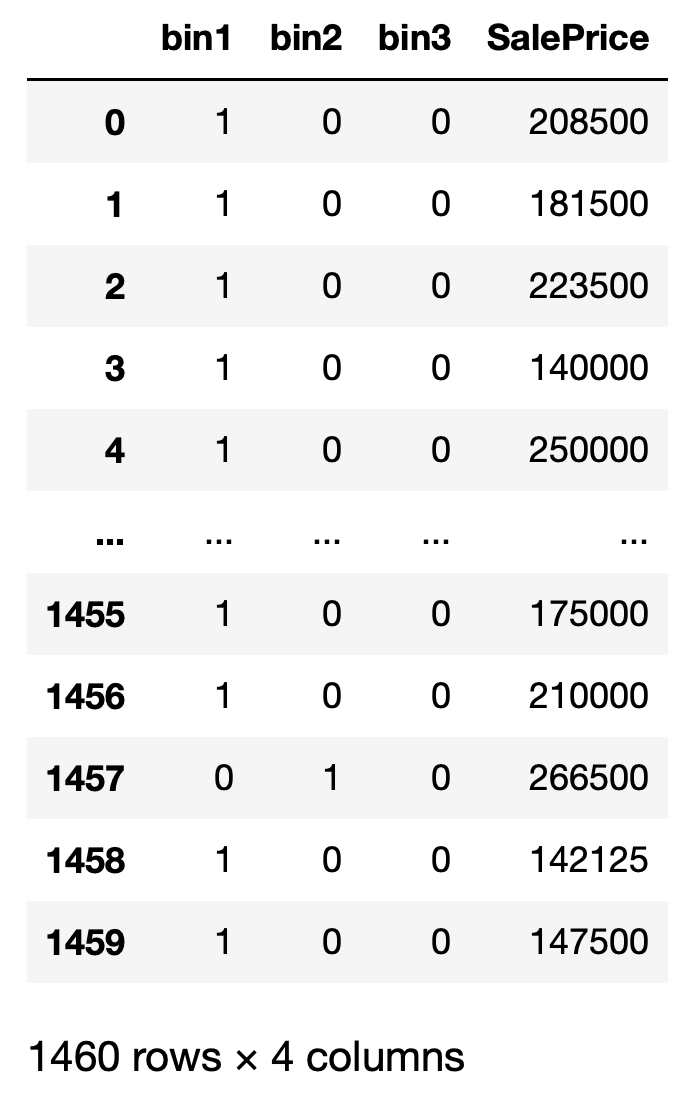
</div>
<br>

(c) Use simple multiplication between the bin columns and SalePrice to generate this table:

<br>
<div>
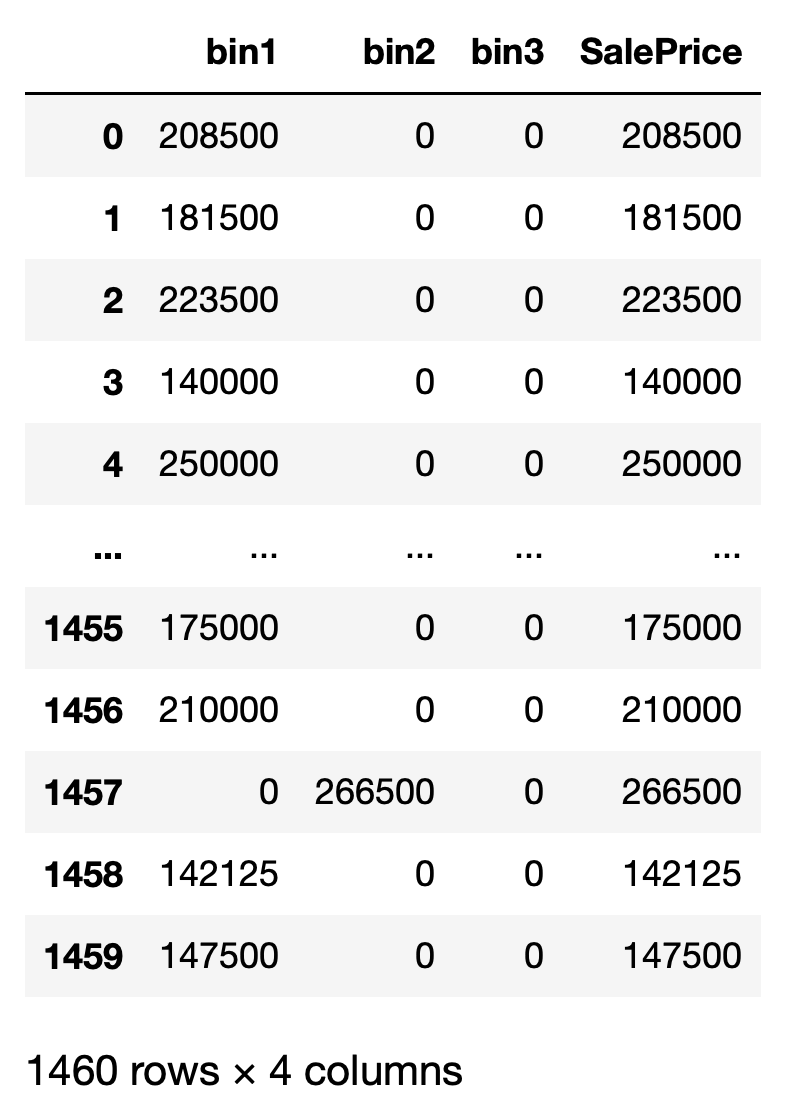
</div>
<br>

(d) Remove the SalePrice column, melt the final dataframe and by using `sns.boxplot()` create the boxplot below. Make sure you're getting exactly the same plot as below with the same axes names and title.
<br>
<div>
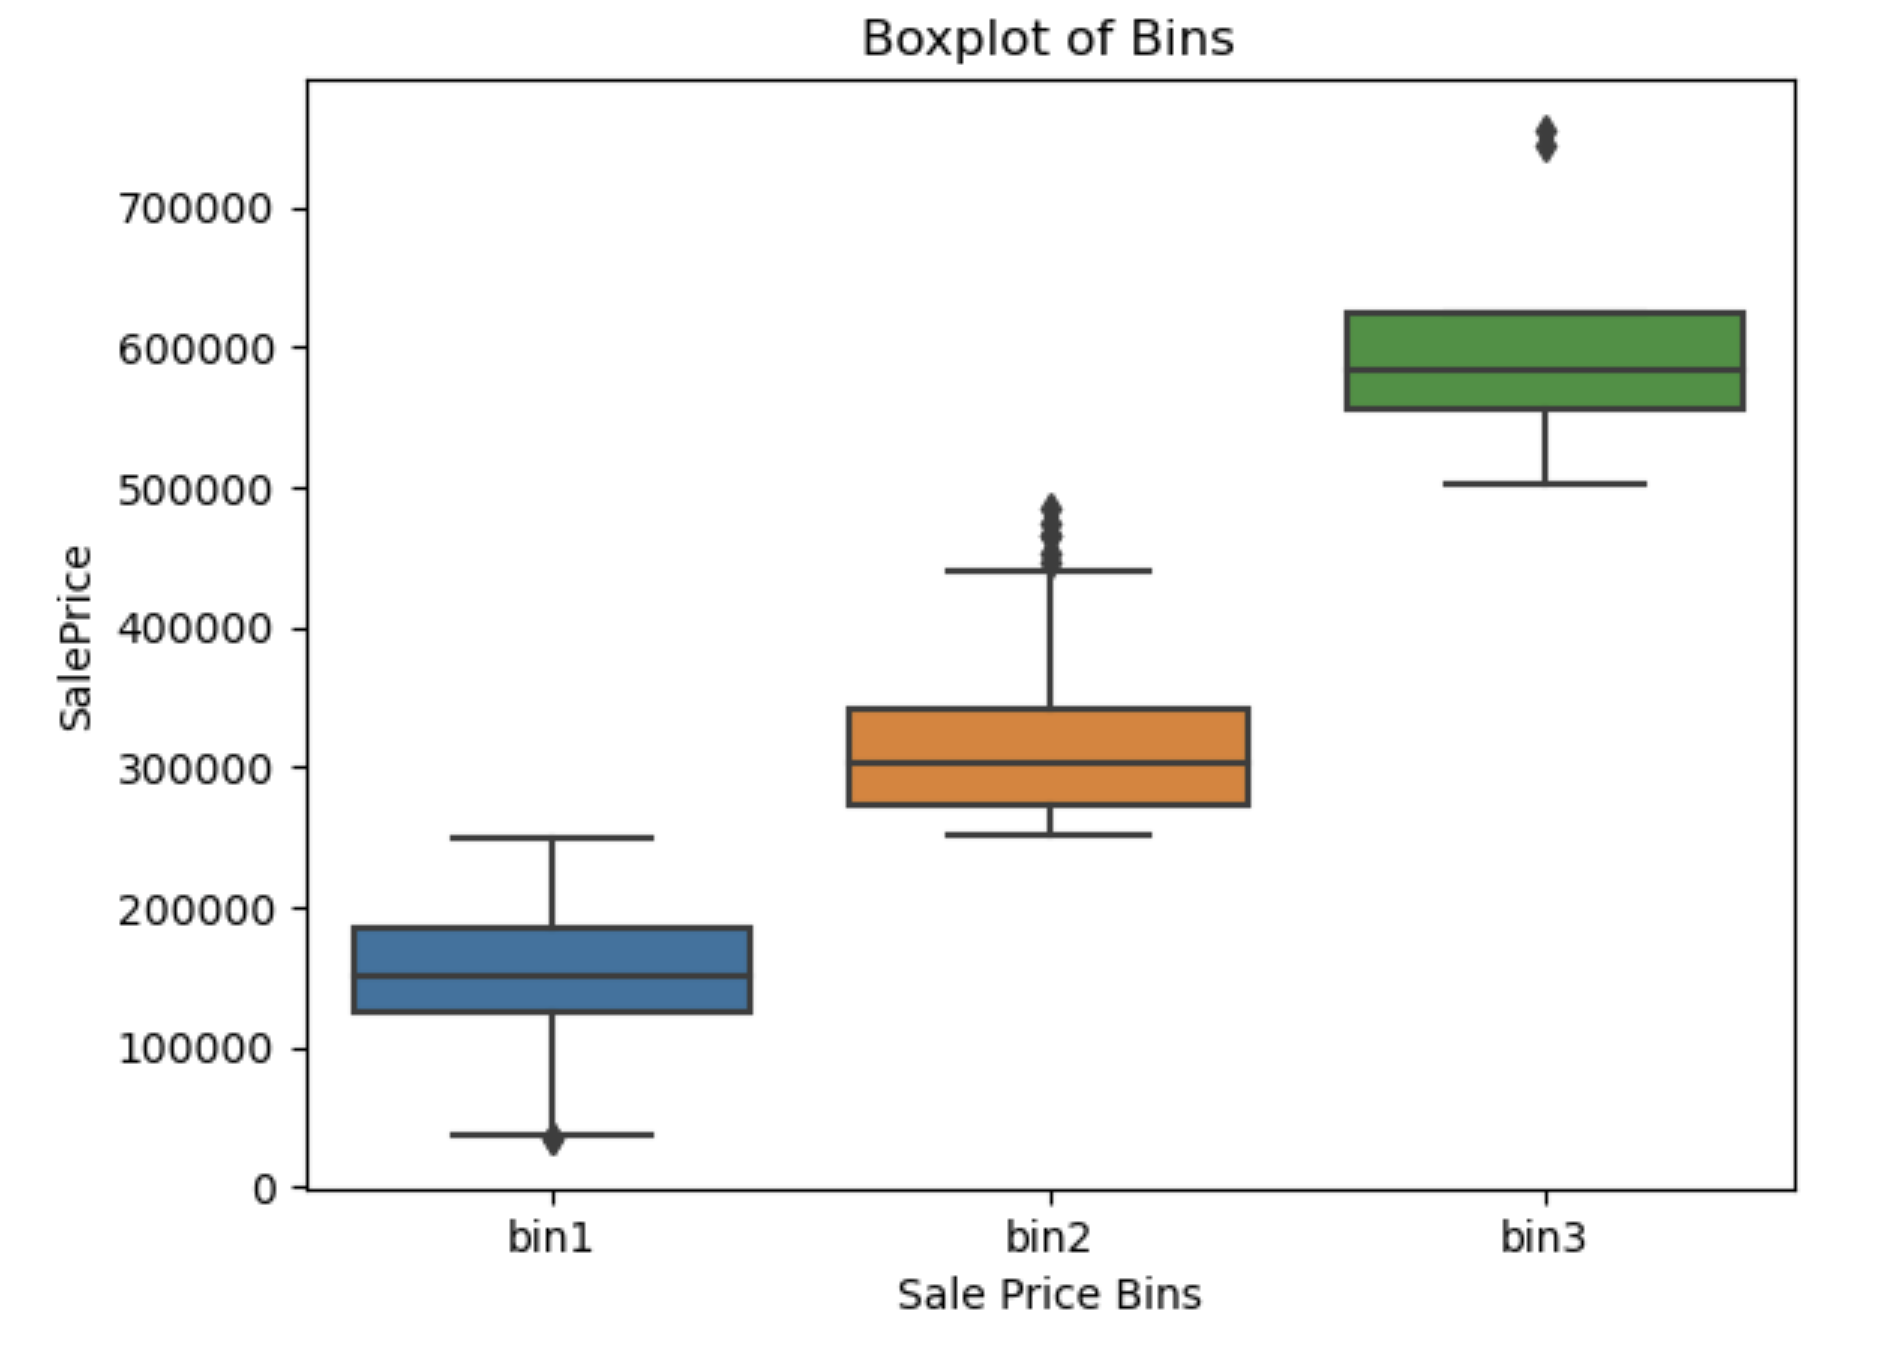
</div>
<br>



In [45]:
#Part a
#Load the dataset
df = pd.read_csv("C:\\Users\\seval\\OneDrive\\Desktop\\DSAI510\\HW4\\house-prices\\train.csv")

In [46]:
# Part b
# Define the bins
bins_SalePrice = [0, 250000, 500000, 1000000]

# Create the binary columns
df['bin1'] = (df['SalePrice'] <= 250000).astype(int)
df['bin2'] = ((df['SalePrice'] > 250000) & (df['SalePrice'] <= 500000)).astype(int)
df['bin3'] = (df['SalePrice'] > 500000).astype(int)

# Make the table as requested
result = df[['bin1', 'bin2', 'bin3', 'SalePrice']]
pd.reset_option('display.max_rows')

#print all rows
print(result)


      bin1  bin2  bin3  SalePrice
0        1     0     0     208500
1        1     0     0     181500
2        1     0     0     223500
3        1     0     0     140000
4        1     0     0     250000
...    ...   ...   ...        ...
1455     1     0     0     175000
1456     1     0     0     210000
1457     0     1     0     266500
1458     1     0     0     142125
1459     1     0     0     147500

[1460 rows x 4 columns]


In [47]:
# Now create the columns with actual prices
df['bin1'] = df['bin1'] * df['SalePrice']  
df['bin2'] = df['bin2'] * df['SalePrice']  
df['bin3'] = df['bin3'] * df['SalePrice'] 

# Make the table as requested
result = df[['bin1', 'bin2', 'bin3', 'SalePrice']]

# Display all rows
print(result)


        bin1    bin2  bin3  SalePrice
0     208500       0     0     208500
1     181500       0     0     181500
2     223500       0     0     223500
3     140000       0     0     140000
4     250000       0     0     250000
...      ...     ...   ...        ...
1455  175000       0     0     175000
1456  210000       0     0     210000
1457       0  266500     0     266500
1458  142125       0     0     142125
1459  147500       0     0     147500

[1460 rows x 4 columns]


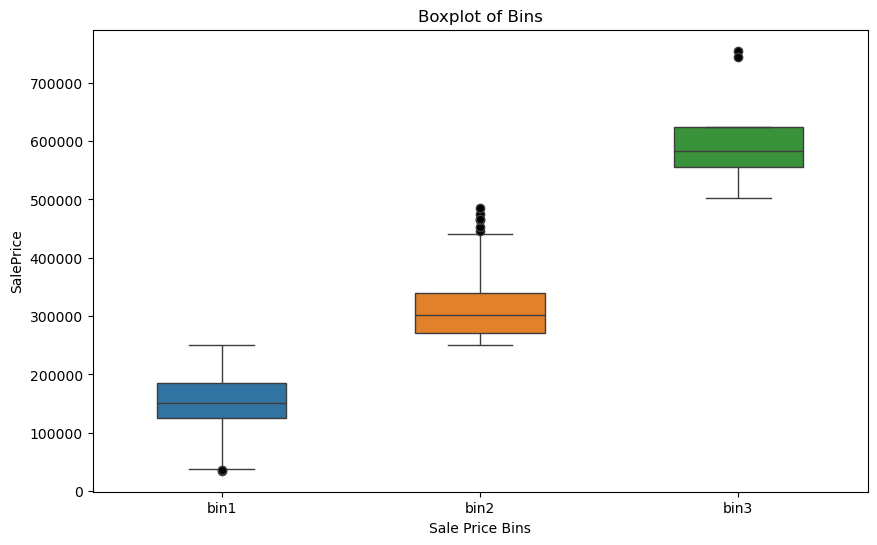

In [48]:
#Part d
# Convert 0s to NaN, Only actual prices are used for calculating statistics (mean, median, quartile) no need for 0
df['bin1'] = df['bin1'].replace(0, np.nan)
df['bin2'] = df['bin2'].replace(0, np.nan)
df['bin3'] = df['bin3'].replace(0, np.nan)

# Remove SalePrice and melt the dataframe
result = df[['bin1', 'bin2', 'bin3']]
melted_df = pd.melt(result, var_name='Sale Price Bins', value_name='SalePrice')

# Define boxplot function
def boxplot(x, y, data, **kwargs):
    sns.boxplot(x=x, y=y, data=data,
                hue=x, # This is necessary for palette
                legend=False,
                palette=['#1f77b4', '#ff7f0e', '#2ca02c'],  # This gives us blue, orange, green
                width=0.5,
                flierprops={'marker':'o', 'markerfacecolor':'black'})
    plt.yticks(range(0, 800000, 100000))

# Create the plot
plt.figure(figsize=(10, 6))
boxplot('Sale Price Bins', 'SalePrice', data=melted_df)

# Set title and labels
plt.title('Boxplot of Bins')
plt.xlabel('Sale Price Bins')
plt.ylabel('SalePrice')

plt.show()

## Problem 2 (5 pts)

Produce the plot of the sliced section of the correlation matrix as shown below. 

Hint: Just use the `correlation_matrix` we generated in the class and single out the relevant variables with `.loc()` method and then use `sns.heatmap()`to create the plot shown below.

<br>
<div>
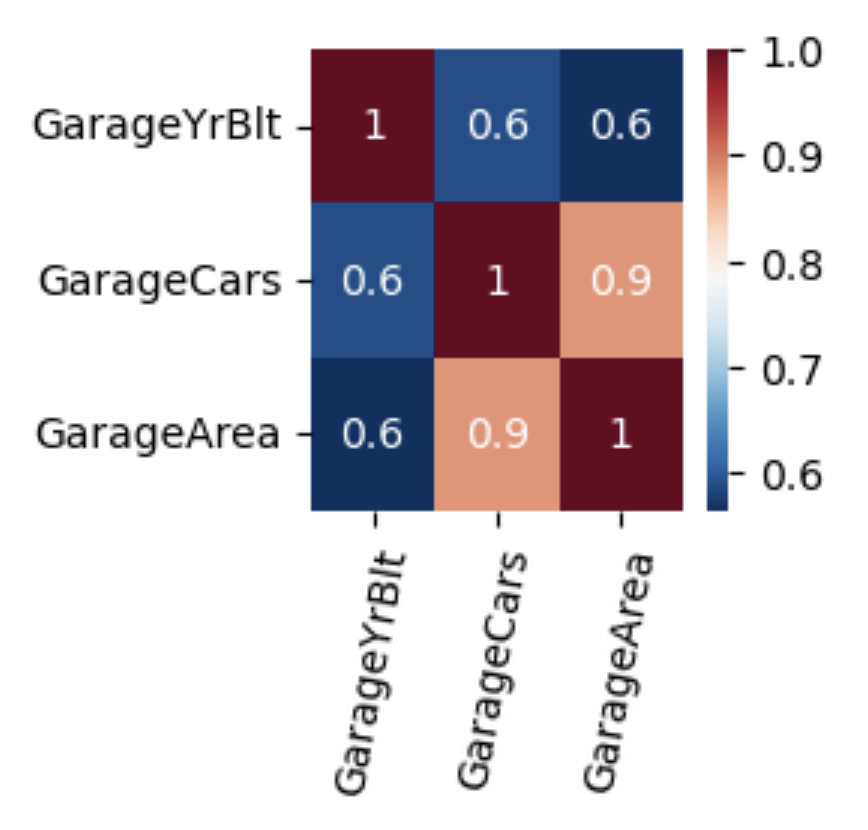
</div>
<br>



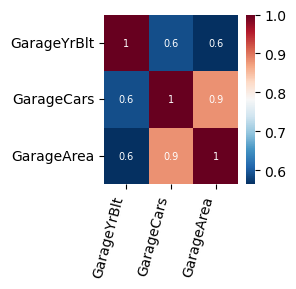

In [49]:
# Define garage variables once (these are our quantitative variables)
garage_vars = ['GarageYrBlt', 'GarageCars', 'GarageArea']

# Create correlation matrix for numeric columns only
correlation_matrix = df[garage_vars].corr()  # Only use garage variables for correlation
garage_correlation = correlation_matrix.loc[garage_vars]

# Create heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(data=garage_correlation,
            annot=True,
            annot_kws={"size": 7},
            cmap='RdBu_r',
            fmt='.1g')

plt.xticks(rotation=75, ha='right')  # Rotate and align x labels
plt.tight_layout() # Adjust layout to prevent label cutoff
plt.show()

## Problem 3 (5 pts)

(a) Load the `Breast_Cancer_Wisconsin.csv` into a dataframe and then **normalize** the numerical columns to the interval [0,1]. Check with `.describe()` and write a sentence or two to explain what exactly in the outcome of `.describe()` tells you the **normalization** you did was successful.

(b) This time, **standardize** the numerical columns. Check with `.describe()` and write a sentence or two to explain what exactly in the outcome of `.describe()` tells you the **standardization** you did was successful.



In [50]:
# a
# Load the data
df = pd.read_csv("C:\\Users\\seval\\OneDrive\\Desktop\\DSAI510\\HW4\\Breast_Cancer_Wisconsin.csv")

# Get numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

print("Before Normalization:")
print(df[numeric_columns].describe().round(3))

# Normalization: (x - min)/(max - min)
df_norm = df.copy()
for column in numeric_columns:
    min_val = df[column].min()
    max_val = df[column].max()
    df_norm[column] = (df[column] - min_val)/(max_val - min_val)

print("After Normalization:")
print(df_norm[numeric_columns].describe().round(3))

Before Normalization:
                 id  radius_mean  texture_mean  perimeter_mean  area_mean  \
count  5.690000e+02      569.000       569.000         569.000    569.000   
mean   3.037183e+07       14.127        19.290          91.969    654.889   
std    1.250206e+08        3.524         4.301          24.299    351.914   
min    8.670000e+03        6.981         9.710          43.790    143.500   
25%    8.692180e+05       11.700        16.170          75.170    420.300   
50%    9.060240e+05       13.370        18.840          86.240    551.100   
75%    8.813129e+06       15.780        21.800         104.100    782.700   
max    9.113205e+08       28.110        39.280         188.500   2501.000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count          569.000           569.000         569.000              569.000   
mean             0.096             0.104           0.089                0.049   
std              0.014             0.053 

In [51]:
# b
# Standardization using z-score: (x - mean)/std
df_std = df.copy()
for column in numeric_columns:
    mean_val = df[column].mean()
    std_val = df[column].std()
    df_std[column] = (df[column] - mean_val)/std_val

# Check standardization results
print("\nAfter Standardization:")
print(df_std[numeric_columns].describe().round(3))
print("\nWe can see standardization worked because mean is approximately 0 and standard deviation is 1 for all columns.")


After Standardization:
            id  radius_mean  texture_mean  perimeter_mean  area_mean  \
count  569.000      569.000       569.000         569.000    569.000   
mean     0.000       -0.000         0.000          -0.000     -0.000   
std      1.000        1.000         1.000           1.000      1.000   
min     -0.243       -2.028        -2.227          -1.983     -1.453   
25%     -0.236       -0.689        -0.725          -0.691     -0.667   
50%     -0.236       -0.215        -0.105          -0.236     -0.295   
75%     -0.172        0.469         0.584           0.499      0.363   
max      7.046        3.968         4.648           3.973      5.246   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count          569.000           569.000         569.000              569.000   
mean            -0.000             0.000           0.000               -0.000   
std              1.000             1.000           1.000                1.000   
min

## Problem 4 - Bayes' Theorem (10 pts)

Let’s assume the probability of being infected by covid is 0.1. If you’re infected, PCR tests show you’re covid positive with 80% accuracy. If you’re not infected, PCR tests show you’re covid positive with probability 1/90 (false positive). If you test covid positive in a PCR test, what is the probability that you’re really infected with covid? 

Hint 1: You can use c+ and c- for covid infection, and pcr+ and pcr- for test results, like P(c+)=0.1. <br>
Hint 2: The answer is 0.89. Show in the cell below your algebraic steps involved in your solution. You don't need to write a Python code.


In [43]:
# P (c+) = 0.1
# P (c-) = 0.9
# P(pcr+|c+) = 0.8 
# P(pcr+|c-) = 1/90 
# P(c+|pcr+)= ????

#Bayes Teorem => P(A|B) = [P(B|A) × P(A)] / P(B)  which means here P(c+|pcr+) = [P(pcr+|c+) × P(c+)] / P(pcr+) here all given except P (pcr+)

#to find P(pcr+) using the law of total probability: P(pcr+) = P(pcr+|c+)×P(c+) + P(pcr+|c-)× P(c-) = 0.8 x 0.1 + 1/90 x 0.9 = 0.08 + 0.01 = 0.09

# Puting all numbers into bayes formula>>> P(c+|pcr+) = ( 0.8 x 0.1 ) / 0.09 = 0.8889 -> approx 0.89, meaning 89%


## Problem 5 (5 pts)

Calculate the mean of the random variable K which assumes the values k=1, 2, 3 and 4 by using the pmf given below.


<br>
<div>
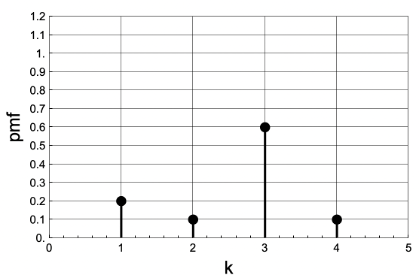
</div>
<br>

(You don't need to write a Python code; please show the algebraic steps involved in your solution.)

In [ ]:
# The mean (expected value) of a discrete random variable is calculated as:
# E[K] = Σ(k × P(K=k))
# Mean = 1 x 0.2 + 2 x 0.1 + 3 x 0.6 + 4 x 0.1 = 2.6

## Problem 6 (10 pts)

A joint pmf is provided on the table, where X and Y are not independent. 

(a)	You randomly select values for X and Y. What is the probability that X=2 and Y=3?

(b)	Your friend randomly select values for X and Y, and tells you that X turned out to be 3, but he does not reveal what Y came out to be. What’s the probability that Y=2 given that you know that X=3.

(c)	What is the probability that Y=3 regardless of the value of X?


<br>
<div>
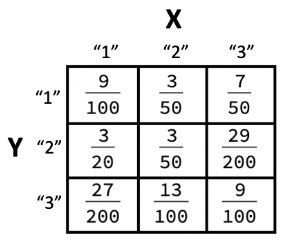
</div>
<br>

(You don't need to write a Python code; please show the algebraic steps involved in your solution and explain your solution in words if necessary.)

In [ ]:
# (a) P(X=2, Y=3) = 13/100 = 0.13 >>> Direct read from table


In [ ]:
# (b) P(Y=2|X=3) = P(Y=2 and X=3) / P(X=3)
# to find P(X=3), we sum all values in the table for x = 3 for any given Y, meaning P (X=3) = 7/50 + 29/200 + 9/100 = 0.375
# Direct read from table P(Y=2 and X=3) is 29/200
# Then P(Y=2|X=3) = 29/200 / 0.375 = 0.38666

In [ ]:
# (c) to find P(Y=3), we sum all values in the table for Y = 3 for any given X, meaning P (Y=3) = 27/200 + 13/100 + 9/100 = 0.355


## Problem 7 (5 pts)

We observe that ice-cream sales and sunburns on people’s back co-occur. Are the statements below True or False?

(a)	"These two phenomena are correlated"    True/False? <br>
(b)	"There’s a direct causal relationship between these two phenomena"    True/False?


In [ ]:
# Your answer (type True or False)
#(a) True
#(b) False

## Problem 8 (10 pts)

A particle in a box can be somewhere between x=0 and x=1 m. The pdf about where it can be found is given by 

$$f(x)=ax(1-x)$$

(a) What should be the value of $a$ so that the pdf is normalized? (Hint 1: The area under the pdf should be equal to 1.) 

(b) What’s the probability that this particle can be found in the region 0≤x≤0.1?

Hint 2: For the second question, you'll take the integral. You can use https://www.wolframalpha.com for that or get help from fellow students. In any case, explain how you did it, or if you used wolframalpha, attach a screenshot by using a Markdown cell. The answer for part (b) is 0.028; but show your work on how you reached the answer.

In [ ]:
# (a)
# Lets integrate f(x) from 0 to 1, which is ax²/2 - ax³/3 should be equal to 1, from x 0 to 1. 
# for x = 0, ax²/2 - ax³/3 = 0
# for x = 1, ax²/2 - ax³/3 = a/2 - a/3 = a/6  should be equal to 1, so a/6=1 => a=6


In [ ]:
# (b)
# P(0 ≤ x ≤ 0.1) is equal integral of f(x)from x 0 to 0.1, meaning we need integral of 6x(1-x)dx for x=0 to x=0.1
# P(0 ≤ x ≤ 0.1) = 6[x²/2 - x³/3] for x=0 to 0.1, meaning 
# for x = 0, P(0 ≤ x ≤ 0.1)=0
# for x = 0.1, 6 [x²/2 - x³/3] = 6x(0.1²/2 - 0.1³/3) = 6x(0.005 + 0.000333..)= 0.028, meaning probability of particle found in the region 0≤x≤0.1 is 2.8%